In [1]:
import pandas as pd
import numpy as np
import datastats as dt
import structdata as st
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

Data Description of variables

In [2]:
data_def = pd.read_csv('Xente/Xente_Variable_Definitions.csv')
data_def

,Column Name,Definition
0,TransactionId,Unique �transaction identifier on platform
1,BatchId,Unique number assigned to a batch of transacti...
2,AccountId,Unique number identifying the customer on plat...
3,SubscriptionId,Unique number identifying the customer subscri...
4,CustomerId,Unique identifier attached to Account
5,CurrencyCode,Country currency
6,CountryCode,Numerical geographical code of country
7,ProviderId,Source provider of Item �bought.
8,ProductId,Item name being bought.
9,ProductCategory,ProductIds are organized into these broader pr...


In [3]:
#Read in data set
train_data = pd.read_csv('Xente/training.csv')
test_data = pd.read_csv('Xente/test.csv')
weather_data = pd.read_excel('Xente/WeatherNairobi2016.xls')
sample_submission = pd.read_csv('Xente/sample_submission_xente.csv')


In [59]:
def get_date_info(data=None, date_feat=None, drop_date=True, concatenate=False):
    '''
    Returns the date information from a given date column
    
    '''
    df = pd.DataFrame()
    df["date" + date_feat]=pd.to_datetime(data[date_feat])
    df[date_feat + "_dayofweek"] = df["date" + date_feat].dt.dayofweek
    df[date_feat + "_dayofyear"] =  df["date" + date_feat].dt.dayofyear
    df[date_feat + "_dayofmonth"] = df["date" + date_feat].dt.day
    df[date_feat + "_hour"] = df["date" + date_feat].dt.hour
    df[date_feat + "_minute"] = df["date" + date_feat].dt.minute
    df[date_feat + "_is_weekend"] = df["date" + date_feat].apply( lambda x : 1 if x  in [5,6] else 0 )
    df[date_feat + "_year"] = df["date" + date_feat].dt.year
    df[date_feat + "_quarter"] = df["date" + date_feat].dt.quarter
    df[date_feat + "_month"] = df["date" + date_feat].dt.month
    
    
    if concatenate:
        df = pd.concat((data, df), axis=1)
        if drop_date:
            df.drop(["date" + date_feat, date_feat], axis=1, inplace=True)
    else:
        if drop_date:
            df.drop(["date" + date_feat], axis=1, inplace=True)
      
    return df

In [12]:
a = dt.get_date_info(train_data, date_feat='TransactionStartTime', concatenate=False)


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


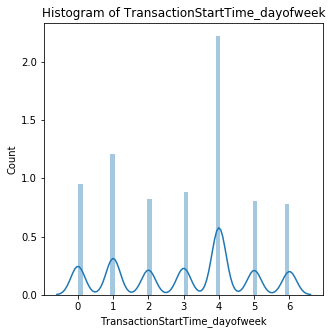

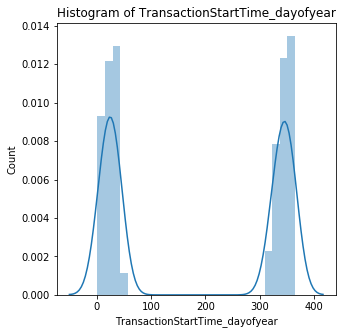

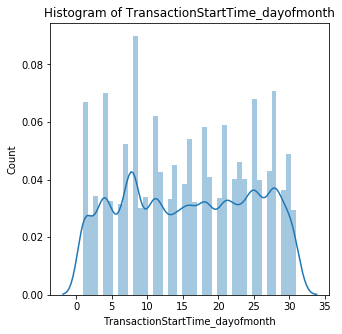

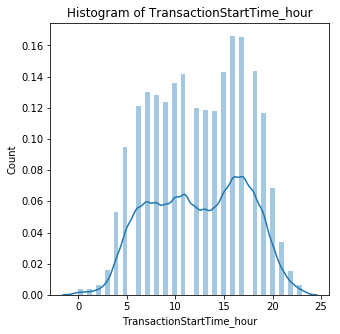

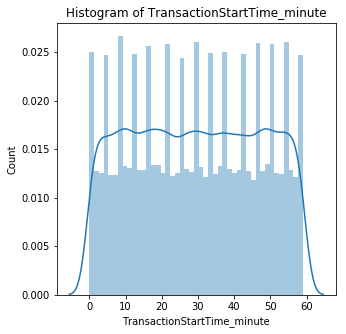

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


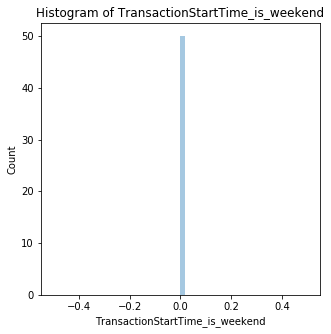

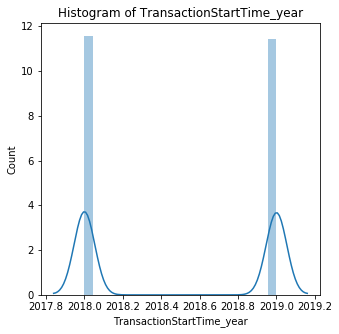

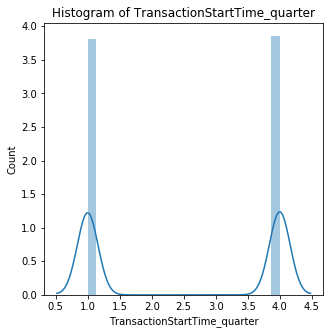

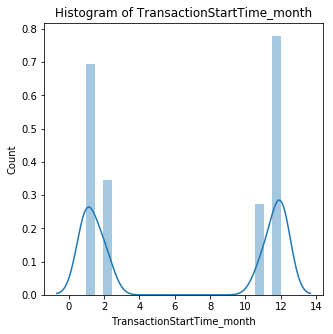

In [13]:
st.(a)

In [ ]:
a['Tra']

In [33]:
date_cols = ['TransactionStartTime', 'TransactionStartTime2']
ss = []
for col in date_cols:
    ss.append(get_date_info(col))

TypeError: get_date_info() missing 1 required positional argument: 'date_col'

In [15]:
df = pd.DataFrame()
df["date"]=pd.to_datetime(train_data["TransactionStartTime"])
df.head()

,date
0,2018-11-15 02:18:49
1,2018-11-15 02:19:08
2,2018-11-15 02:44:21
3,2018-11-15 03:32:55
4,2018-11-15 03:34:21


In [7]:
dt.describe(train_data, name='Train')

Shape of Train data set: (95662, 16)
----------------------------------------------------------------------------------------------------


Size of Train data set: 1530592
----------------------------------------------------------------------------------------------------


Data Types
Note: All Non-numerical features are identified as objects
TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object
----------------------------------------------------------------------------------------------------


Numerical Features in Data